In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

### Descriptive Analysis 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Pearson correlation method

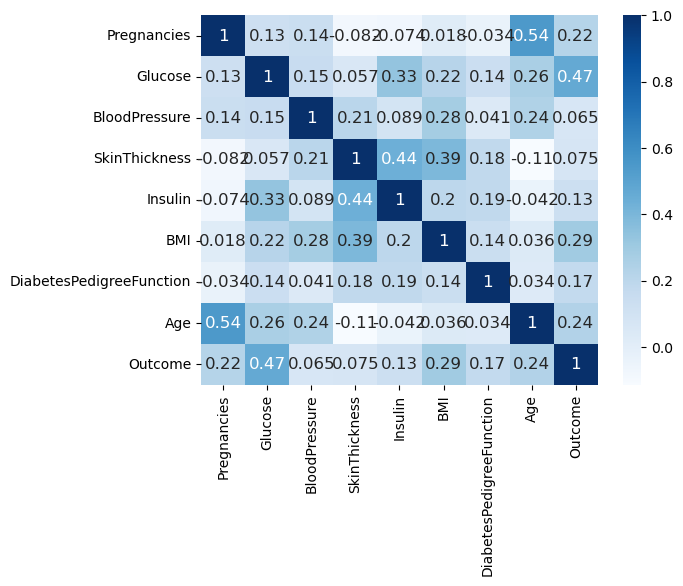

In [6]:
dfcorr=df.corr(method="pearson")
sns.heatmap(dfcorr,annot=True,annot_kws={"size":12},cmap="Blues")
plt.show()

### Covariance Matrix

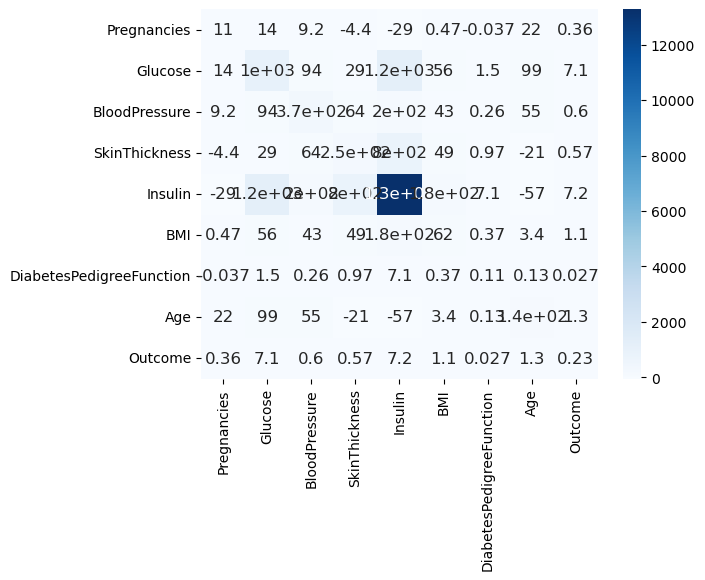

In [7]:
dfcov=df.cov()
sns.heatmap(dfcov,annot=True,annot_kws={"size":12},cmap="Blues")
plt.show()

### Creating the X and Y arrays

In [8]:
x=df.iloc[::,0:8]
y=df.iloc[::,-1]

### Splitting  data into Training and Test data set

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

### The eigen Matrix
The most common collinearity detection method is the tolerance and Variance inflation Factor(VIF)

This can also be done using eigen values where

       *Eigen values less than 0 indicate multicollinearity
       *Eigen Value between 10 and 100 indicate slight multicollinearity
       *eigen values above 100 show servere multicollinearity

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(dfcov)
eigenvalues = pd.DataFrame(eigenvalues)
eigenvectors = pd.DataFrame(eigenvectors)
eigens = pd.concat([eigenvalues,eigenvectors],axis=1)
eigens.index = df.columns
eigens.columns = ("Eigen values","Pregnancies","Glucose","BloodPressure",
"SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome")
eigens

,Eigen values,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,13456.577591,-0.002022,0.022650,-0.022465,-0.049041,-0.151620,-0.005077,-0.986468,0.018049,0.010692
Glucose,932.805966,0.097812,0.972186,0.143425,0.119804,0.087995,0.050824,-0.000769,0.006061,0.000643
BloodPressure,390.577869,0.016093,0.141901,-0.922468,-0.262749,0.232160,0.075596,0.001177,-0.002469,-0.000071
SkinThickness,198.184055,0.060757,-0.057856,-0.307012,0.884371,-0.259927,0.221412,0.000379,0.001118,-0.002349
Insulin,112.693345,0.993111,-0.094629,0.020977,-0.065549,0.000169,-0.006137,-0.001426,-0.000072,-0.000295
BMI,45.837383,0.014011,0.046977,-0.132444,0.192811,-0.021518,-0.970677,0.003045,0.013921,0.000672
DiabetesPedigreeFunction,7.763548,0.000537,0.000817,-0.000640,0.002699,-0.001642,-0.002032,0.006306,-0.239281,0.970922
Age,0.164361,-0.003565,0.140168,-0.125454,-0.301007,-0.920492,-0.014979,0.162649,0.003234,-0.001209
Outcome,0.099139,0.000585,0.007010,0.000309,0.002625,-0.006131,-0.013184,-0.019319,-0.970655,-0.239141


### Normalizing the data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Modelling

In [13]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

#### Logistic Hyperparametre optimization

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid={"dual":[True,False],
           "fit_intercept":[True,False],
           "max_iter":[1,10,100,1000],
           "penalty":("l1","l2"),
           "tol":[0.0001,0.001,0.01,1.0],
           "warm_start":[False,True]}
grid_model=GridSearchCV(estimator=logreg,param_grid=param_grid)
grid_model.fit(x_train,y_train)
print("Best score:",grid_model.best_score_,"Best parametre:",grid_model.best_params_)

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best score: 0.7590297214447554 Best parametre: {'dual': False, 'fit_intercept': True, 'max_iter': 10, 'penalty': 'l2', 'tol': 0.0001, 'warm_start': False}


D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
960 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\ALL python and adata science\anaconda run\Li

### Predictions

In [31]:
y_pred=logreg.predict(x_test)
y_pred_df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
y_pred_df

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,1
527,0,0


### Finding the intercept and the estimated coeff

In [32]:
logreg.intercept_

array([-0.78763914])

In [33]:
logreg.coef_

array([[ 0.3097449 ,  1.06006236, -0.26057825,  0.06865213, -0.15816976,
         0.68419394,  0.29353764,  0.2396453 ]])

### Evaluation of a logistic classifier using Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cmlogreg=pd.DataFrame(confusion_matrix(y_test,y_pred),
                     index=["Actual:No","Actual:yes"],
                     columns=("Predicted:No","Predicted:yes"))
cmlogreg
# print(y_test)

,Predicted:No,Predicted:yes
Actual:No,98,9
Actual:yes,18,29


### Classification report

In [38]:
from sklearn import metrics
c_report_log=pd.DataFrame(metrics.classification_report(y_test,y_pred,output_dict=True)).transpose()
c_report_log

,precision,recall,f1-score,support
0,0.844828,0.915888,0.878924,107.000000
1,0.763158,0.617021,0.682353,47.000000
accuracy,0.824675,0.824675,0.824675,0.824675
macro avg,0.803993,0.766455,0.780638,154.000000
weighted avg,0.819902,0.824675,0.818931,154.000000


### ROC Curve

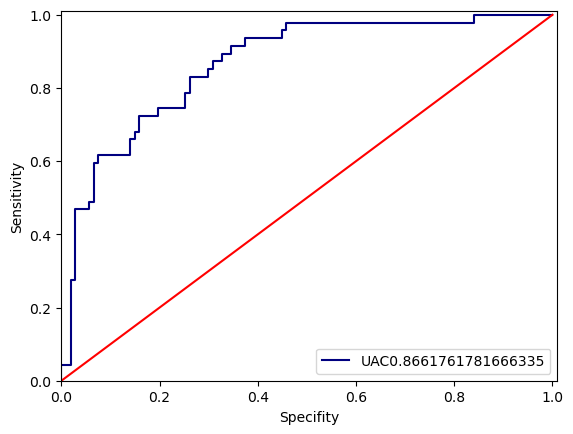

'. It indicates how the classifier distinguishes\nbetween classes. The closer the area under the curve score is to 1, the better the\npredictive power the model has. The AUC score is 0.87. Using the 80/20 rule, the\nclassifier is skillful in distinguishing classes between actual classes and predicted classes.'

In [50]:
y_predlogreg_proba=logreg.predict_proba(x_test)[::,1]
fprlogreg,tprlogreg,_= metrics.roc_curve(y_test,y_predlogreg_proba)
auclogreg=metrics.roc_auc_score(y_test,y_predlogreg_proba)
plt.plot(fprlogreg,tprlogreg,label="UAC"+str(auclogreg),color="navy")
plt.plot([0,1],[0,1],color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.xlabel("Specifity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()

'''. It indicates how the classifier distinguishes
between classes. The closer the area under the curve score is to 1, the better the
predictive power the model has. The AUC score is 0.87. Using the 80/20 rule, the
classifier is skillful in distinguishing classes between actual classes and predicted classes.'''

### Precission recall curve
We use the precision-recall curve to show the trade-offs between precision and recall
across different thresholds.

Ideally, we want a curve that straightforwardly moves to the
top right and sharply bends horizontally. Such a curve has high precision and high recall.
This means that the binary classifier gets all the predictions correct



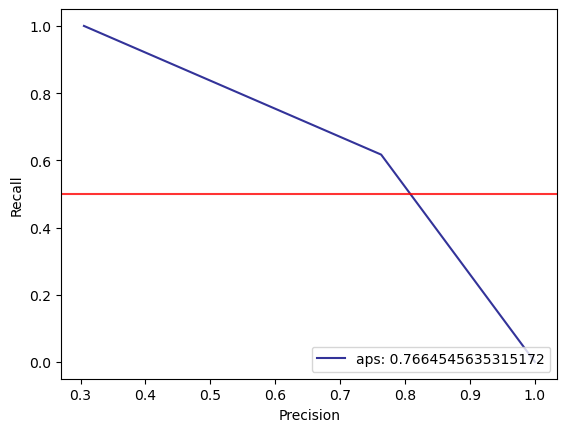

'To make sense of a precision-recall curve, we unbundle the central tendency. An\naverage precision score (APS) is the arithmetic average of the precision scores inside the\nprecision-recall curve. The classifier is precise 76% of the time'

In [49]:


precisionlogreg, recalllogreg, thresholdlogreg = metrics.precision_recall_curve(y_test,y_pred)
apslogreg = metrics.roc_auc_score(y_test,y_pred)
plt.plot(precisionlogreg, recalllogreg, label="aps: "+str(apslogreg),
color="navy",alpha=0.8)
plt.axhline(y=0.5,color="red",alpha=0.8)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=4)
plt.show()
'''The curve  does not approach the top-right border; rather, it slowly
declines to the bottom right. This indicates that there is an overlap between patients with
diabetes and those without diabetes. The precision and recall are not high enough.'''


'''To make sense of a precision-recall curve, we unbundle the central tendency. An
average precision score (APS) is the arithmetic average of the precision scores inside the
precision-recall curve. The classifier is precise 76% of the time'''


### Learning curve
A learning curve finds whether a model has a low bias error term (under-fitting) and high variance (over-fitting).
It depicts a model’s learning process over time.

This curve enables us to determine the extent to which we can benefit from increased data points
in the training data and to find out whether the estimator suffers variance error or bias.

There are two types of learning curves, namely, training learning curve (calculated from
the training data) and validation learning curve (calculated using the validation data).

A learning curve has two axes: the training set size on the x-axis and the accuracy score on
the y-axis.

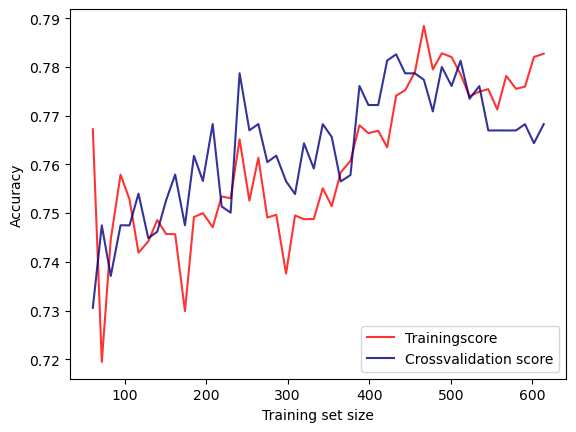

'At the beginning phase of the learning process, the logistic classifier over-fits.\nHowever, as the training set size increases, the classifier over-fits less. As the classifier\napproaches the 400th data point, the cross-validation accuracy score starts to decrease.\nAdding more data points will not increase generalization'

In [47]:
from sklearn.model_selection import learning_curve
trainsizelogreg, trainscorelogreg, testscorelogreg = learning_curve(logreg,x, y, cv=5, n_jobs=5, train_sizes=np.linspace(0.1,1.0,50))
trainscorelogreg_mean = np.mean(trainscorelogreg,axis=1)
testscorelogreg_mean = np.mean(testscorelogreg,axis=1)
plt.plot(trainsizelogreg,trainscorelogreg_mean,color="red", label="Trainingscore", alpha=0.8)
plt.plot(trainsizelogreg,testscorelogreg_mean,color="navy", label="Crossvalidation score", alpha=0.8)
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.legend(loc=4)
plt.show()
'''At the beginning phase of the learning process, the logistic classifier over-fits.
However, as the training set size increases, the classifier over-fits less. As the classifier
approaches the 400th data point, the cross-validation accuracy score starts to decrease.
Adding more data points will not increase generalization'''